# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [73]:
import pandas as pd
import numpy as np                                 

import pylab as plt                                
import seaborn as sns                              
sns.set(style='white')                             


from sklearn.linear_model import LogisticRegression  
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import balanced_accuracy_score as bas
from sklearn.metrics import precision_score as pes
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix as cm

from sklearn.preprocessing import StandardScaler               
from sklearn.preprocessing import LabelEncoder               

from sklearn.model_selection import train_test_split as tts
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [6]:
from sklearn.datasets import fetch_california_housing
hou = fetch_california_housing()


X = pd.DataFrame(hou["data"], columns=hou["feature_names"])
y = pd.DataFrame(hou["target"], columns=['MEDV'])

hou = pd.concat([X, y], axis=1)

In [7]:
hou.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [11]:
X_train, X_test, y_train, y_test=tts(X, y, 
                                     train_size=0.8,
                                     test_size=0.2,
                                     random_state=42)

In [27]:
X_train.shape, y_test.shape

((16512, 8), (4128, 1))

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [14]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred[:10]

array([[0.71912284],
       [1.76401657],
       [2.70965883],
       [2.83892593],
       [2.60465725],
       [2.01175367],
       [2.64550005],
       [2.16875532],
       [2.74074644],
       [3.91561473]])

In [18]:
y_pred_train = model.predict(X_train)
y_pred_train[:5]

array([[1.93725845],
       [2.48910616],
       [2.64735483],
       [1.56589492],
       [1.61312839]])

## 3. Calculate and print R-squared for both the training and the testing set.

In [19]:
r2(y_train, y_pred_train)   #r2 del train

0.6125511913966952

In [17]:
r2(y_test, y_pred)          #r2 del test

0.5757877060324511

## 4. Calculate and print mean squared error for both the training and the testing set.

In [22]:
mse(y_train, y_pred_train)   #mse del train

0.5179331255246699

In [23]:
mse(y_test, y_pred)           #mse del test

0.555891598695244

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [24]:
mae(y_train, y_pred_train)     #mae del train

0.5286283596581928

In [25]:
mae(y_test, y_pred)            #mae del test

0.5332001304956558

## Classification Model Evaluation

In [26]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

In [29]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [38]:
data['class'].unique()

array([0, 1, 2])

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [28]:
X_train, X_test, y_train, y_test=tts(X, y, 
                                     train_size=0.8,
                                     test_size=0.2,
                                     random_state=42)

In [39]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [33]:
model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred[:10]

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

In [34]:
y_pred_train = model.predict(X_train)
y_pred_train[:10]

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0])

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [42]:
acc(y_test, y_pred)

1.0

In [45]:
acc(y_train, y_pred_train)

0.975

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [48]:
bas(y_test, y_pred)

1.0

In [49]:
bas(y_train, y_pred_train)

0.975609756097561

## 10. Calculate and print the precision score for both the training and the testing set.

In [52]:
pes(y_test, y_pred, average='micro')

1.0

In [53]:
pes(y_train, y_pred_train, average='micro')

0.975

In [54]:
pes(y_test, y_pred, average='macro')

1.0

In [55]:
pes(y_train, y_pred_train, average='macro')

0.9761904761904763

In [56]:
pes(y_test, y_pred, average='weighted')

1.0

In [57]:
pes(y_test, y_pred, average='weighted')

1.0

In [ ]:
# compruebo en tanto test como train para cada posible combinación a ver como varía.

# por el nombre parece que weithed es el que las nivela pero ?

## 11. Calculate and print the recall score for both the training and the testing set.

In [61]:
recall_score(y_test, y_pred, average='micro')

1.0

In [62]:
recall_score(y_train, y_pred_train, average='micro')

0.975

In [63]:
recall_score(y_test, y_pred, average='macro')

1.0

In [64]:
recall_score(y_train, y_pred_train, average='macro')

0.975609756097561

In [ ]:
# varían bien poquito :s

## 12. Calculate and print the F1 score for both the training and the testing set.

In [68]:
f1(y_test, y_pred, average='micro')

1.0

In [69]:
f1(y_train, y_pred_train, average='micro')

0.975

In [70]:
f1(y_test, y_pred, average='macro')

1.0

In [71]:
f1(y_train, y_pred_train, average='macro')

0.9749960931395533

## 13. Generate confusion matrices for both the training and the testing set.

In [74]:
cm(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

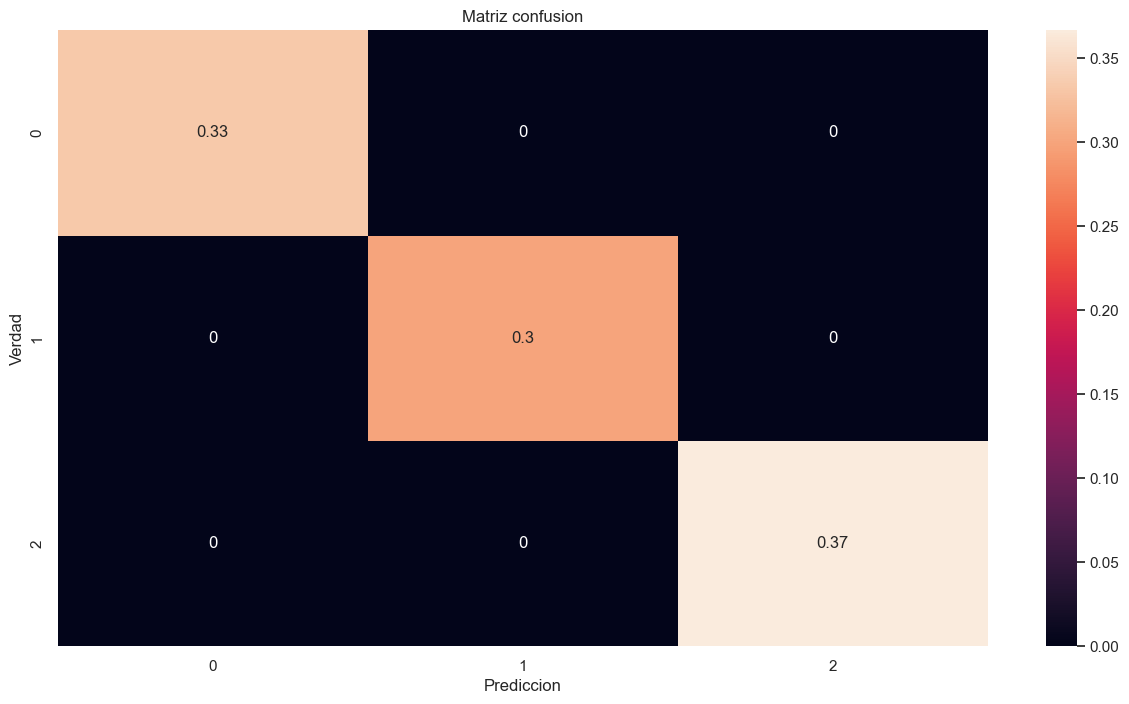

In [76]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test, y_pred)/cm(y_test, y_pred).sum(), annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

In [75]:
cm(y_train, y_pred_train)

array([[40,  0,  0],
       [ 0, 38,  3],
       [ 0,  0, 39]], dtype=int64)

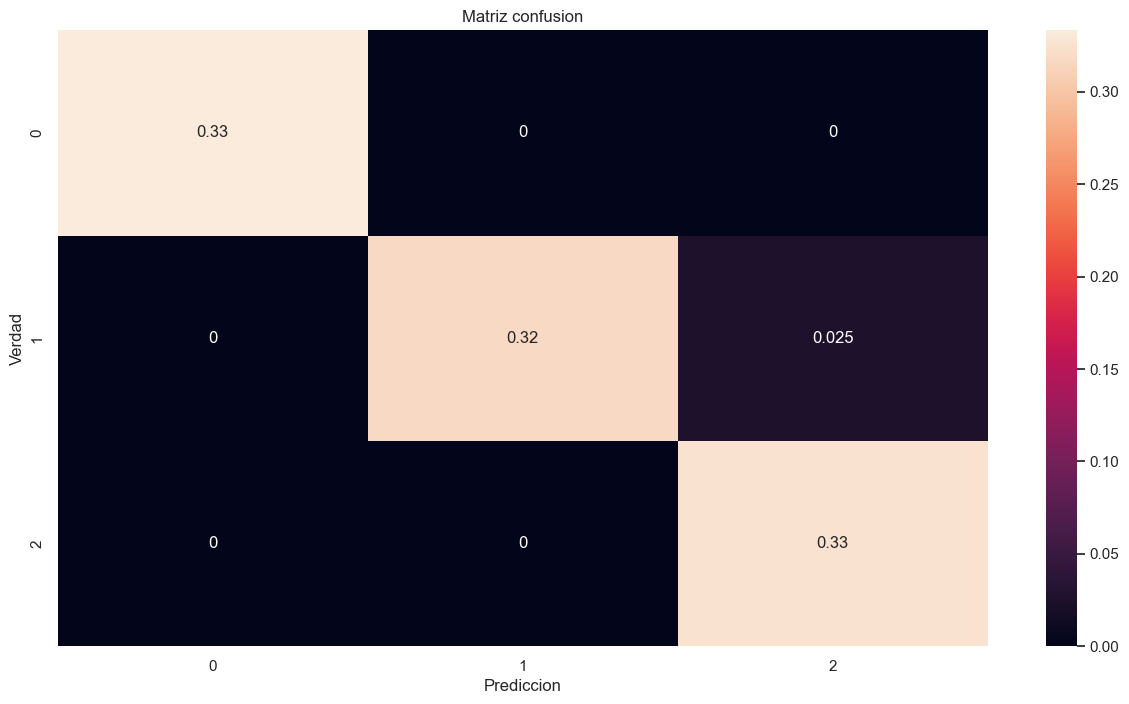

In [77]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_train, y_pred_train)/cm(y_train, y_pred_train).sum(), annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.